# Trabajo de Predicción
El objetivo de este trabajo consiste en aplicar la técnica de Random Forest utilizando un archivo con datos acerca de los clicks recibidos desde un portal metabuscador de hoteles. De esta manera, se podrán predecir si estas búsquedas terminan o no en una reserva consolidada.

# Lectura y Visualización de Datos
Lo primero que se realiza es la lectura de los datos proporcionados. Además, se visualizarán algunos de los datos de los que se compone el archivo, de tal manera que se puedan comprender los mismos.

In [1]:
# Importación del paquete Pandas para la lectura del archivo.
import pandas as pd

In [2]:
# Carga del archivo con los datos.
data = pd.read_csv("./clicks.csv")

In [3]:
# Visualización de los primeros elementos.
data.head(5)

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale
0,2016-04-01,89,2016-04-18,2016-04-26,2,0,255858,0
1,2016-04-01,89,2016-05-27,2016-05-28,2,2,80563,0
2,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
3,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
4,2016-04-01,89,2016-07-13,2016-08-20,2,0,849,0


In [4]:
print ("Características iniciales: " + str(len(data.columns)))
print ("Elementos totales: " + str(len(data.index)))

Características iniciales: 8
Elementos totales: 158161


In [5]:
# Visualización de los tipos de datos contenidos en el archivo.
data.dtypes

date         object
remite_id     int64
checkin      object
checkout     object
adults        int64
children      int64
hotel_id      int64
sale          int64
dtype: object

In [6]:
# Visualización de las variables junto con el total de los diferentes valores que toma cada una.

caracteristicas = data.columns

for caracteristica in caracteristicas:
    print ("Valores diferentes para la característica '" + caracteristica + "':")
    print (data[caracteristica].value_counts())

    if "sale" != caracteristica:
        print ("\n")

Valores diferentes para la característica 'date':
2016-04-04    25001
2016-04-01    24225
2016-04-05    23563
2016-04-03    23552
2016-04-06    22394
2016-04-07    20342
2016-04-02    19084
Name: date, dtype: int64


Valores diferentes para la característica 'remite_id':
27     126015
130     15892
89      13912
316      1645
317       697
Name: remite_id, dtype: int64


Valores diferentes para la característica 'checkin':
2016-04-24    9026
2016-04-09    4768
2016-04-08    4479
2016-04-10    3882
2016-04-30    3270
2016-04-29    3235
2016-04-22    3122
2016-04-17    2966
2016-04-15    2910
2016-04-23    2689
2016-04-16    2621
2016-04-02    2260
2016-05-01    2235
2016-05-13    2094
2016-08-01    2093
2016-05-14    2061
2016-04-05    1974
2016-04-07    1935
2016-04-03    1761
2016-05-06    1667
2016-07-04    1631
2016-07-18    1607
2016-05-07    1557
2016-08-08    1532
2016-08-15    1501
2016-04-11    1438
2016-04-06    1413
2016-08-22    1388
2016-07-01    1315
2016-05-27    1259
   

Como se puede observar, existe un total de 8 características y 158.161 elementos dentro del archivo proporcionado. Como se describe en el enunciado, las características son las siguientes:

   - date (objeto). Fecha del click (acotado a una semana, como se ve en los resultados anteriores).
   - remite_id (int64). Mercado geográfico del portal.
   - checkin (objeto). Fecha de checkin en la búsqueda.
   - checkout (objeto). Fecha de checkout en la búsqueda.
   - adults (int64). Número de adultos en la búsqueda.
   - children (int64). Número de niños en la búsqueda.
   - hotel_id (int64). Hotel en el que se ha hecho click.
   - sale (int64). Si el click resultó en una reserva (1) o no (0).

Además, no existen datos nulos en el archivo, por lo que no será necesario su tratamiento antes de trabajar con los datos.

In [7]:
# Obtención de datos estadísticos de las variables cuantitativas iniciales.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
remite_id,158161.0,47.086842,47.328124,27.0,27.0,27.0,27.0,317.0
adults,158161.0,2.016970,0.397708,1.0,2.0,2.0,2.0,5.0
children,158161.0,0.469819,0.786577,0.0,0.0,0.0,1.0,4.0
hotel_id,158161.0,125089.567295,97022.122353,4.0,4676.0,151728.0,192149.0,398894.0
sale,158161.0,0.019543,0.138425,0.0,0.0,0.0,0.0,1.0


# Tratamiento y Graficado de los Datos Iniciales

In [8]:
# Importación de paquetes necesarios para la representación gráfica de los datos.
import matplotlib.pyplot as plt
import seaborn as sb

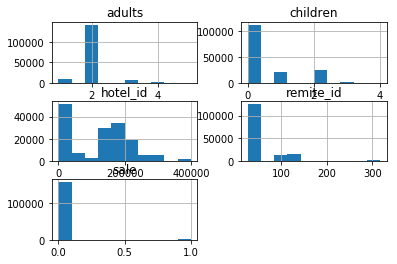

In [9]:
# Visualización de los valores del dataset
data.hist()
plt.show()

Como se puede observar en las gráficas anteriores, y mirando a los resultados de la ejecución de celdas anteriores, se desprenden algunos hechos. El primero, que la fecha de check-in y check-out para la mayoría de los viajes era para ese mismo año, aunque hay una minoría para el año siguiente. La cantidad de adultos mayoritaria en las consultas era de 2. De igual manera, la cantidad de niños en la mayoría de las consultas fue de 0. Por último, únicamente el 1.954% de las búsquedas resultó en una reserva final.

# Predicción
A continuación, se realizarán los pasos necesarios para llevar a cabo una predicción utilizando la técnica de *Random Forest*. Para ello, se han seleccionado las características *remite_id*, *adults*, *children* y *hotel_id*, descartando las relacionadas con las fechas, puesto que no se consideran de relevancia para la consecución del objetivo de predicción.

In [10]:
# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

En el caso de que se utilice una separación de los registros de manera aleatoria, se utilizarían las líneas contenidas en las dos siguientes celdas. Aunque se puede definir un *random_state* a la hora de llamar a la función *train_test_split* como semilla para la aleatoriedad de la generación de los diferentes *subsets* (definido a 0 en el ejemplo), de manera que se pueda conseguir un resultado determinista, se ha optado por separar los datos por fechas. Esta decisión ha sido tomada en base a la documentación proporcionada de la asignatura de DSI, donde se recomienda que, siempre y cuando haya una <<dimensión temporal para cortar>>, se realice esta tarea de manera estática.

Por tanto, en lugar de utilizar un 60% para entrenamiento (0.6 x 158161=94.897) y 40% para evaluación (0.4 x 158161=63.264), se utilizarán las fechas de búsqueda de los registros, ya que el tiempo de estas es de una semana. Finalmente, se decide dividir los registros del 2016-04-01 al 2016-04-04 para entrenamiento y del 2016-04-05 al 2016-04-07 para evaluación.

In [11]:
# Importación del paquete necesario para la extracción de las muestras de entrenamiento y test.
from sklearn.model_selection import train_test_split

In [12]:
# Extracción de las muestras de entrenamiento (X_train, y_train) y de prueba (X_test, y_test).
# Se ha establecido un porcentaje del 60% para el entrenamiento y un 40% para evaluar el modelo.

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [13]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [14]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

In [15]:
print (str(X_train.count()) + "\n")
print (y_test.count())

remite_id    91862
adults       91862
children     91862
hotel_id     91862
dtype: int64

sale    66299
dtype: int64


Como se puede observar, aunque la cantidad de registros no es exactamente 60%/40%, el número de estos en cada *dataset* utilizando la separación de fechas se acerca mucho. 

In [16]:
# Importación del paquete necesario para la creación de un modelo usando un clasificador basado en Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importación de la librería numpy.
import numpy as np

In [17]:
# Creación del modelo.
# Se define 'n_jobs' a -1, de manera que se utilicen todos los núcleos disponibles, así como 'random_state=0'
# para obtener resultados deterministas en cada ejecución.

model = RandomForestClassifier(n_jobs=-1, random_state=0)

# Construcción del modelo
# model.fit(X_train, y_train)

A continuación, se realizarán algunas pruebas de cara a determinar el valor para el número de estimadores y la profundidad máxima que debe alcanzar cada uno de los árboles.

Por defecto, los parámetros utilizados para algunas de los parámetros más importantes son los siguientes:

 - El **criterio de selección** para la creación del modelo es el de ***gini***, que mide la pureza del corte.
 - El **número mínimo de observaciones** requeridas para dividir un nodo (*split size*) es 2.
 - El **número mínimo de observaciones** (*leaf size*) por nodo final es 1.
 
Además, se utilizará el *score* que se obtenga para cada una de las ejecuciones. Este valor representa la precisión media de la predicción realizada en cada paso.

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

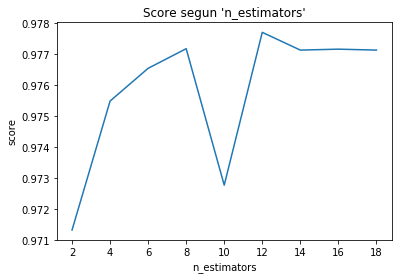

In [18]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

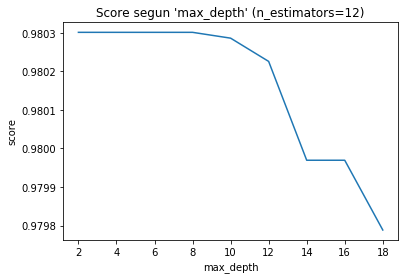

In [19]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(max_depth=n, n_estimators=12)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=12)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

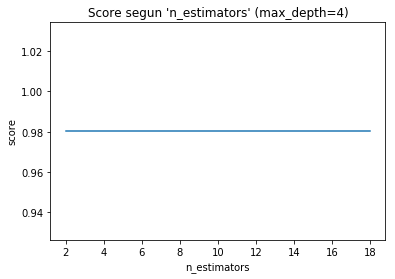

In [20]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(n_estimators=n, max_depth=4)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=4)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

Tras observar los gráficos de las pruebas se llega a las siguientes conclusiones (el último gráfico se ha realizado con el fin de unificar los resultados de las pruebas anteriores):

 - En la primera ejecución, el aumento en el **número de estimadores** (por defecto, todos los nodos se expanden al máximo) favorece el *score*, alcanzando un mínimo global en 2 y un mínimo local en 10. El mejor resultado se observa cuando este parámetro se sitúa en el valor 12, mientras que conforme aumenta el número, el *score* tiende a mantenerse constante. Por tanto, será el que se utilizará para la predicción final, puesto que cuanto mayor sea este número, el bosque se encontrará más poblado y la votación para llevar a cabo la decisión será más precisa.
 - En la segunda ejecución, el aumento en la **profundidad máxima** no varía hasta alcanzar una profundidad de 8, desde donde comienza a decrecer. Por tanto, en pos de generar un modelo no demasiado complejo, pero que sea capaz de realizar unas buenas predicciones, se escogerá el valor de 4 (ni demasiada profundidad ni demasiada poca).

In [21]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.set_params(max_depth=4, n_estimators=12)
model.fit(X_train, y_train)

print("'Score' con 12 estimadores y profundidad de 4: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 12 estimadores y profundidad de 4: 98.030%


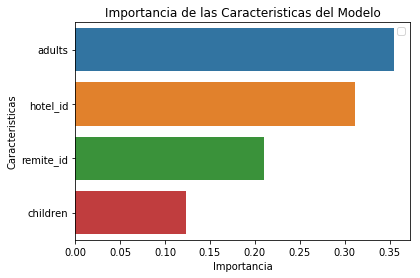

Relevancias de las características:


,Características,Random Forests
0,remite_id,0.210487
1,adults,0.354919
2,children,0.123061
3,hotel_id,0.311533


In [22]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

De acuerdo con los valores de las importancias de las diferentes características utilizadas para la creación del modelo, ***adults*** (número de adultos en la búsqueda) es la que más importancia acapara, seguida de ***hotel_id*** (hotel en el que se ha hecho click), ***remite_id*** (mercado geográfico del portal) y, por último, ***children*** (número de niños en la búsqueda).

## Matriz de Confusión

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[64993,     0],
       [ 1306,     0]])

## Comprobación Predicciones Modelo Original

A continuación, puesto que cabe la posibilidad de que el modelo tienda a "sobreaprender", se realizarán algunas pruebas con algunas muestras de datos diferentes, de manera que se pueda comprobar (o no) la existencia de este fenómeno.

In [25]:
for prueba in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    predictions = model.predict(X_test)
    print (confusion_matrix(y_test, predictions))
    print "\n"

[[62076     0]
 [ 1189     0]]


[[62025     0]
 [ 1240     0]]


[[62029     0]
 [ 1236     0]]


[[62035     0]
 [ 1230     0]]


[[62050     0]
 [ 1215     0]]


[[62020     0]
 [ 1245     0]]


[[62027     0]
 [ 1238     0]]


[[62021     0]
 [ 1244     0]]


[[62012     0]
 [ 1253     0]]


[[62027     0]
 [ 1238     0]]




## Reglas Árboles Modelo Original

In [ ]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

Tras las pruebas realizadas con diferentes conjuntos de datos, se puede observar que el modelo predice muy bien cuándo no se va a realizar la reserva (0), mientras que parece no predecir el caso contrario (1), realizando siempre predicciones con un mismo y único resultado. Esto puede deberse a que la cantidad de estos casos, como se ha mencionado anteriormente, es muy pequeña, no alcanzando el 2% del total de las muestras, lo que podría ser insuficiente para el modelo propuesto. Por último, se han extraído las reglas de los árboles que conforman dicho modelo.

No obstante, a continuación se van a realizar otros modelos para llevar a cabo algunas pruebas más, de cara a mejorar el resultado de las predicciones de reservas ya sea balanceando las características, extrayendo nuevas características, etc.

# Prueba Modelo 2 (Balanceo)

Esta prueba estará basada en la anterior aunque, esta vez, realizando un balanceo de las características a la hora de generar el modelo, puesto que existe una gran diferencia en cuanto a la cantidad de muestras de cada clase a predecir. De igual manera, se realizará el estudio de la cantidad de estimadores y profundidad de los árboles, utilizando las mismas características para la construcción del modelo.

In [27]:
data = pd.read_csv("./clicks.csv")

# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

In [28]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [29]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

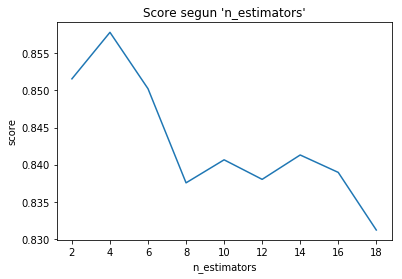

In [30]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

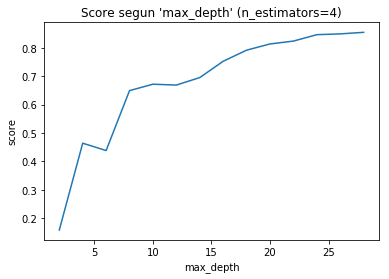

In [31]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=n, n_estimators=4)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=4)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

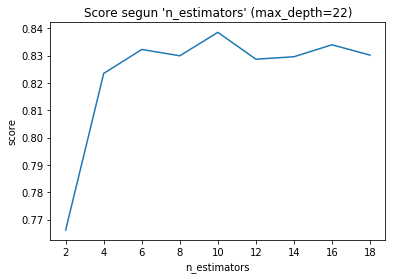

In [32]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=22, n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=22)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

Según los resultados obtenidos con el balanceo, se extrae una mejor predicción cuando la cantidad de estimadores (**n_estimators**) es de 12, mientras que la profundidad máxima (**max_depth**) es de 22.

In [33]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
model.set_params(max_depth=22, n_estimators=12)
model.fit(X_train, y_train)

print("'Score' con 12 estimadores y profundidad de 18: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 12 estimadores y profundidad de 18: 82.870%


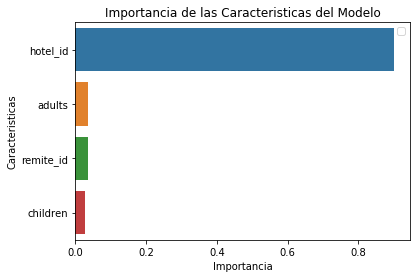

Relevancias de las características:


,Características,Random Forests
0,remite_id,0.035348
1,adults,0.035440
2,children,0.028421
3,hotel_id,0.900791


In [34]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

## Matriz de Confusión

In [35]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[54649, 10344],
       [ 1013,   293]])

## Comprobación Predicciones Modelo 2

In [36]:
for prueba in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    predictions = model.predict(X_test)
    print (confusion_matrix(y_test, predictions))
    print "\n"

[[51865 10157]
 [  629   614]]


[[51886 10117]
 [  642   620]]


[[51830 10204]
 [  600   631]]


[[51844 10117]
 [  679   625]]


[[51987 10009]
 [  624   645]]


[[51889 10131]
 [  635   610]]


[[51784 10254]
 [  608   619]]


[[51759 10240]
 [  660   606]]


[[51955 10041]
 [  654   615]]


[[51813 10165]
 [  643   644]]




## Reglas Árboles Modelo 2

In [ ]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

A priori, se observa que la calidad de la predicción con respecto al modelo original ha disminuido de 98.030% a 84.066%. Además, las importancias de las características bajan drásticamente, a excepción de *hotel_id*, que se mantiene alrededor del 92%. No obstante, este segundo modelo es capaz de predecir alrededor del 50% de casos positivos (1), a costa de fallar también en los casos negativos (0) en un 20%, aproximadamente.

# Prueba Modelo 3 (Extracción Características)
Este tercer modelo se basará en la extracción de algunas de las características deducibles de los datos originales. Para la construcción del modelo, en este caso, se van a extraer las características *weekday*/*weekend* (si la búsqueda se realiza entre semana o en fin de semana) y *season_checkin* (estación meteorológica del *checkin*). Para determinar la estación se utilizará el siguiente modelo: abril-junio (primavera), julio-septiembre (verano), octubre-diciembre (otoño), enero-marzo (invierno).

In [38]:
data = pd.read_csv("./clicks.csv")
data['season_checkin'] = pd.DatetimeIndex(data['checkin']).month.map({1: 1, 2: 1, 3: 1,
                                                                        4: 2, 5: 2, 6: 2,
                                                                        7: 3, 8: 3, 9: 3,
                                                                        10: 4, 11: 4, 12: 4})
data['weekend'] = data['date'].map({'2016-04-01': 0,
                                   '2016-04-02': 1,
                                   '2016-04-03': 1,
                                   '2016-04-04': 0,
                                   '2016-04-05': 0,
                                   '2016-04-06': 0,
                                   '2016-04-07': 0})

In [39]:
# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id', 'season_checkin', 'weekend']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

In [40]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [41]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

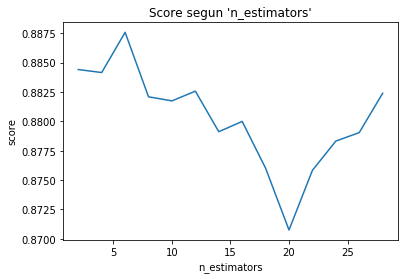

In [42]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

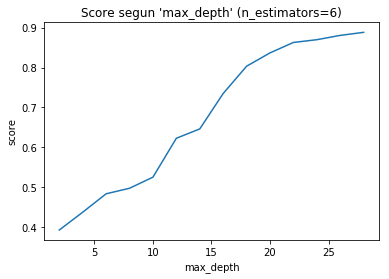

In [43]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=n, n_estimators=6)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=6)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

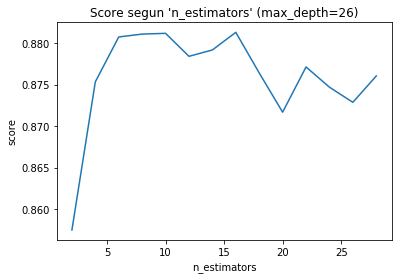

In [44]:
# Probar con diferentes cantidades de estimadores (n_estimators) de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=26, n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=26)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

In [45]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
model.set_params(n_estimators=16, max_depth=26)
model.fit(X_train, y_train)

print("'Score' con 16 estimadores y profundidad de 26: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 16 estimadores y profundidad de 26: 88.133%


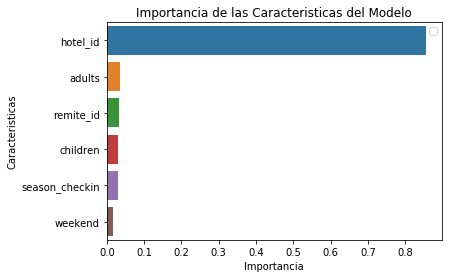

Relevancias de las características:


,Características,Random Forests
0,remite_id,0.032554
1,adults,0.036005
2,children,0.030073
3,hotel_id,0.854757
4,season_checkin,0.029007
5,weekend,0.017605


In [46]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

## Matriz de Confusión

In [47]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[58248,  6745],
       [ 1123,   183]])

## Comprobación Predicciones Modelo 3

In [48]:
for prueba in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    predictions = model.predict(X_test)
    print (confusion_matrix(y_test, predictions))
    print "\n"

[[55262  6816]
 [  586   601]]


[[55160  6863]
 [  607   635]]


[[55265  6793]
 [  621   586]]


[[55235  6820]
 [  603   607]]


[[55262  6758]
 [  632   613]]


[[55324  6700]
 [  628   613]]


[[55302  6756]
 [  608   599]]


[[55299  6740]
 [  623   603]]


[[55236  6771]
 [  602   656]]


[[55221  6804]
 [  615   625]]




## Reglas Árboles Modelo 3

In [ ]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

En este último modelo, a pesar de haber extraído características adicionales, los resultados han resultado ligeramente mejores en cuanto al error al predecir los casos negativos (0), aunque no han mejorado en exceso.

Por tanto, tras realizar un primer modelo únicamente con los datos iniciales sin balancear, un segundo modelo con los datos balanceados y un tercero extrayendo, además, características adicionales, se concluye el estudio de este *dataset* con la técnica de predicción asignada.